https://datafai.com/2017/11/14/principal-component-analysis-pca-using-scikit/
Curse of Dimensionality(https://en.wikipedia.org/wiki/Curse_of_dimensionality)
Singular Value Decomposition(https://en.wikipedia.org/wiki/Singular-value_decomposition)

In [32]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
#Import the datasets
wine=pd.read_csv('winequality-white.csv',sep=";")
wine.columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']

In [33]:
#Data Exploration
wine.head()
wine.shape
np.round(wine.describe(),2)
wine.quality.nunique()
wine.groupby('quality').size()
wine.columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


(4898, 12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.85,0.28,0.33,6.39,0.05,35.31,138.36,0.99,3.19,0.49,10.51,5.88
std,0.84,0.10,0.12,5.07,0.02,17.01,42.50,0.00,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,108.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,10.40,6.00
75%,7.30,0.32,0.39,9.90,0.05,46.00,167.00,1.00,3.28,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


7

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [34]:
means = wine.pivot_table('density',['fixed acidity','alcohol'],'quality')
means

quality                        3        4        5        6        7        8  \
fixed acidity alcohol                                                           
3.8           12.400000      NaN      NaN      NaN  0.99248      NaN      NaN   
3.9           12.800000      NaN      NaN      NaN      NaN      NaN  0.98900   
4.2           8.000000   0.99688      NaN      NaN      NaN      NaN      NaN   
              12.000000      NaN      NaN      NaN      NaN  0.98999      NaN   
4.4           12.200000      NaN      NaN      NaN      NaN  0.99022      NaN   
              12.800000      NaN      NaN      NaN      NaN      NaN  0.98904   
              13.100000      NaN      NaN      NaN  0.98816      NaN      NaN   
4.5           8.000000       NaN      NaN  0.99332      NaN      NaN      NaN   
4.6           10.200000      NaN      NaN  0.99426      NaN      NaN      NaN   
4.7           10.500000      NaN      NaN  0.99212      NaN      NaN      NaN   
              11.300000      NaN      NaN      NaN  0.99080      NaN      NaN   
              13.600000      NaN      NaN  0.98722      NaN      NaN      NaN   
              13.800000      NaN      NaN      NaN  0.98981      NaN      NaN   
              14.000000      NaN      NaN      NaN      NaN  0.98746      NaN   
4.8           9.900000       NaN      NaN  0.99370  0.99390      NaN      NaN   
              10.300000      NaN      NaN      NaN  0.99132      NaN      NaN   
              11.300000      NaN      NaN      NaN      NaN  0.99020      NaN   
              11.500000      NaN      NaN      NaN      NaN  0.99274      NaN   
              11.800000      NaN      NaN      NaN      NaN  0.98980      NaN   
              11.900000      NaN      NaN      NaN  0.98924      NaN      NaN   
              12.200000      NaN      NaN      NaN      NaN  0.99324      NaN   
              13.500000      NaN  0.99246      NaN      NaN      NaN      NaN   
4.9           9.400000       NaN      NaN      NaN  0.99540      NaN      NaN   
              10.100000      NaN      NaN  0.99138      NaN      NaN      NaN   
              10.466667      NaN      NaN  0.99212      NaN      NaN      NaN   
              11.500000      NaN      NaN      NaN  0.98964      NaN      NaN   
              14.000000      NaN      NaN      NaN      NaN      NaN  0.98713   
5.0           9.400000       NaN      NaN      NaN  0.99540      NaN      NaN   
              9.900000       NaN      NaN      NaN  0.99400      NaN      NaN   
              10.000000      NaN      NaN  0.99438      NaN      NaN      NaN   
...                          ...      ...      ...      ...      ...      ...   
9.4           11.000000  0.99395      NaN      NaN      NaN      NaN      NaN   
              12.500000      NaN      NaN      NaN  0.99210      NaN      NaN   
9.5           9.500000       NaN      NaN  0.99590      NaN      NaN      NaN   
              11.000000      NaN      NaN      NaN  0.99510      NaN      NaN   
9.6           9.500000       NaN      NaN      NaN  0.99440      NaN      NaN   
              10.500000      NaN      NaN  0.99380      NaN      NaN      NaN   
              10.600000      NaN      NaN  0.99260      NaN      NaN      NaN   
              10.900000      NaN      NaN  0.99370      NaN      NaN      NaN   
              12.600000      NaN      NaN      NaN  0.99188      NaN      NaN   
9.7           9.500000       NaN      NaN  0.99580      NaN      NaN      NaN   
              10.000000      NaN      NaN      NaN  0.99368      NaN      NaN   
              10.800000      NaN      NaN      NaN  0.99260      NaN      NaN   
9.8           9.200000       NaN      NaN  0.99560      NaN      NaN      NaN   
              9.500000       NaN      NaN  1.00040      NaN      NaN      NaN   
              9.600000       NaN      NaN  0.99587      NaN      NaN      NaN   
              10.000000      NaN  0.99770  0.99580      NaN      NaN      NaN   
              10.100000      Na

In [35]:
#create features and labels
x=wine.drop('quality',axis=1)
y=wine['quality']
x.head()
y.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [36]:
np.round(x.describe(),2)
np.round(y.describe(),2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.85,0.28,0.33,6.39,0.05,35.31,138.36,0.99,3.19,0.49,10.51
std,0.84,0.10,0.12,5.07,0.02,17.01,42.50,0.00,0.15,0.11,1.23
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,108.00,0.99,3.09,0.41,9.50
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,10.40
75%,7.30,0.32,0.39,9.90,0.05,46.00,167.00,1.00,3.28,0.55,11.40
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20


count    4898.00
mean        5.88
std         0.89
min         3.00
25%         5.00
50%         6.00
75%         6.00
max         9.00
Name: quality, dtype: float64

Standardize the data

In [37]:
#Standardize the data
from sklearn.preprocessing import scale
x_scaled=scale(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()
x_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03
mean,-3.481630e-16,4.497106e-16,1.160543e-17,-1.066249e-16,2.321087e-17,-1.015476e-17,-4.642174e-17,3.256485e-14,-1.183754e-15,-8.218098e-16,-3.713739e-16
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00
min,-3.620351e+00,-1.966985e+00,-2.761743e+00,-1.141944e+00,-1.683274e+00,-1.958677e+00,-3.044230e+00,-2.313038e+00,-3.101408e+00,-2.364709e+00,-2.043297e+00
25%,-6.575011e-01,-6.771010e-01,-5.304757e-01,-9.250474e-01,-4.473347e-01,-7.237750e-01,-7.144739e-01,-7.707066e-01,-6.508363e-01,-6.997104e-01,-8.242757e-01
50%,-6.493106e-02,-1.809917e-01,-1.172780e-01,-2.349217e-01,-1.269060e-01,-7.692173e-02,-1.026189e-01,-9.609320e-02,-5.475133e-02,-1.739212e-01,-9.286267e-02
75%,5.276390e-01,4.143393e-01,4.611988e-01,6.918185e-01,1.935226e-01,6.287364e-01,6.739664e-01,6.930457e-01,6.075653e-01,5.271310e-01,7.198184e-01
max,8.705106e+00,8.153643e+00,1.095642e+01,1.171411e+01,1.374308e+01,1.491831e+01,7.098444e+00,1.503130e+01,4.184075e+00,5.171602e+00,2.995326e+00


#Fit PCA Model, number of components will be same as number of variables

In [38]:
#Fit PCA Model, number of components will be same as number of variables
from sklearn.decomposition import PCA
pca=PCA().fit(x_scaled)

In [39]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
str(pca.explained_variance_ratio_)

'[0.29293217 0.14320363 0.11106103 0.09259294 0.08848496 0.08534014\n 0.06605437 0.05448713 0.03764942 0.02631701 0.00187719]'

In [41]:
str(pca.explained_variance_ratio_.sum())

'1.0'

In [42]:
pca=PCA(5).fit(x_scaled)

In [43]:
str(pca.explained_variance_ratio_.sum())

'0.7282747359911349'

In [44]:
pca.explained_variance_

array([3.2229119 , 1.57556161, 1.22192081, 1.01873034, 0.97353334])

In [45]:
pca_df=pd.DataFrame(pca.components_,columns=x.columns)
pca_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.157218,0.005089,0.144050,0.427408,0.212011,0.300334,0.406652,0.511524,-0.128832,0.043379,-0.437238
1,-0.587558,0.051728,-0.345295,0.008749,-0.008800,0.290355,0.244032,0.006297,0.581344,0.222695,-0.035569
2,0.121368,-0.590971,0.504397,-0.214320,-0.102367,0.279410,0.124375,-0.129203,0.126672,0.433244,0.105903
3,0.018584,0.274115,0.148514,-0.273765,0.710712,-0.305585,-0.060456,-0.022061,0.097753,0.442060,-0.141079
4,0.251048,0.642617,0.053905,0.011391,-0.328628,0.176912,0.293010,-0.084588,-0.119826,0.400585,0.337419


Colormap as below:
Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

#Heatmap of components

<Figure size 720x720 with 0 Axes>

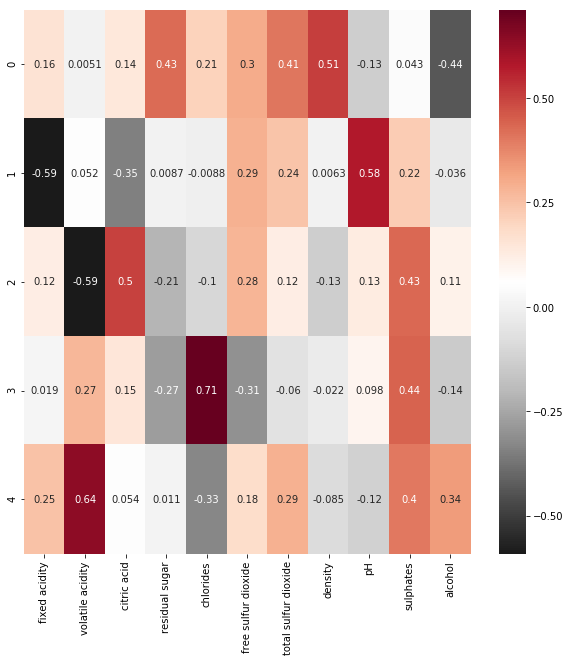

In [46]:
#Heatmap of components
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
import seaborn as sns
sns.heatmap(pca_df,cmap='RdGy_r',annot=True)
plt.show()

#original features

In [47]:
#original features
x_scaled.shape

(4898, 11)

In [48]:
x_scaled_trnsf=pca.fit_transform(x_scaled)

#transformed features

In [49]:
#transformed features
x_scaled_trnsf=pd.DataFrame(x_scaled_trnsf,columns=('P1','P2','P3','P4','P5'))
x_scaled_trnsf.head()
x_scaled_trnsf.shape

,P1,P2,P3,P4,P5
0,3.676944,-0.545233,-0.930422,-1.135374,-0.292855
1,-0.644588,0.430770,-0.356331,0.999117,-0.714078
2,0.155291,-1.189800,-0.017532,0.270219,-0.367706
3,1.455374,0.099680,-0.001956,-0.423022,-0.469981
4,1.455374,0.099680,-0.001956,-0.423022,-0.469981


(4898, 5)